## Support Vector Machines

### SVM 분류 모델

In [31]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 4, random_state=8)
y=y%2

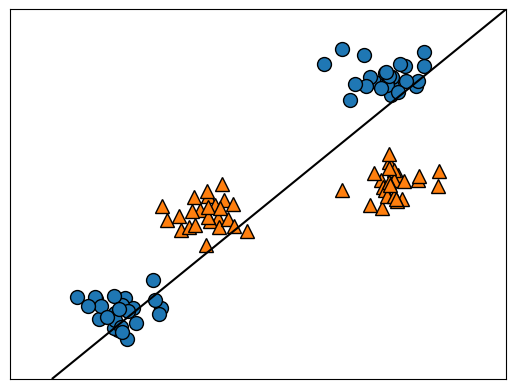

In [36]:
from sklearn.svm import LinearSVC
import mglearn
import numpy as np

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [39]:
X_new = np.hstack([X, X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [43]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
mask = y == 0

In [47]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max()+2.50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max()+2.50)

<Figure size 640x480 with 0 Axes>

In [58]:
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX+coef[1]*YY+intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',cmap=mglearn.cm2, s=60, edgecolor='k')

/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_5441/1260870438.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_5441/1260870438.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',cmap=mglearn.cm2, s=60, edgecolor='k')


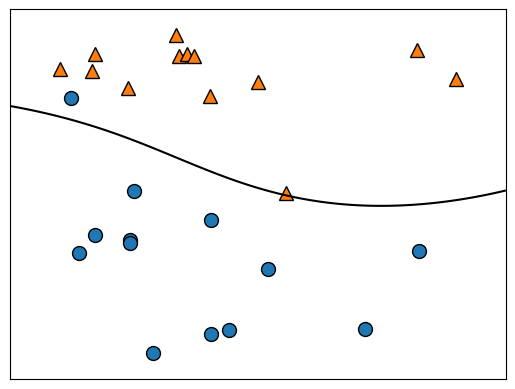

In [19]:
from sklearn.svm import SVC
import mglearn

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:0], X[:1], y)

Text(0, 0.5, '특성 1')

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


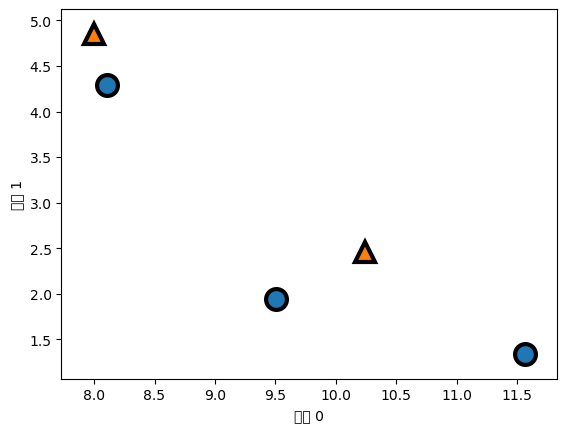

In [61]:
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

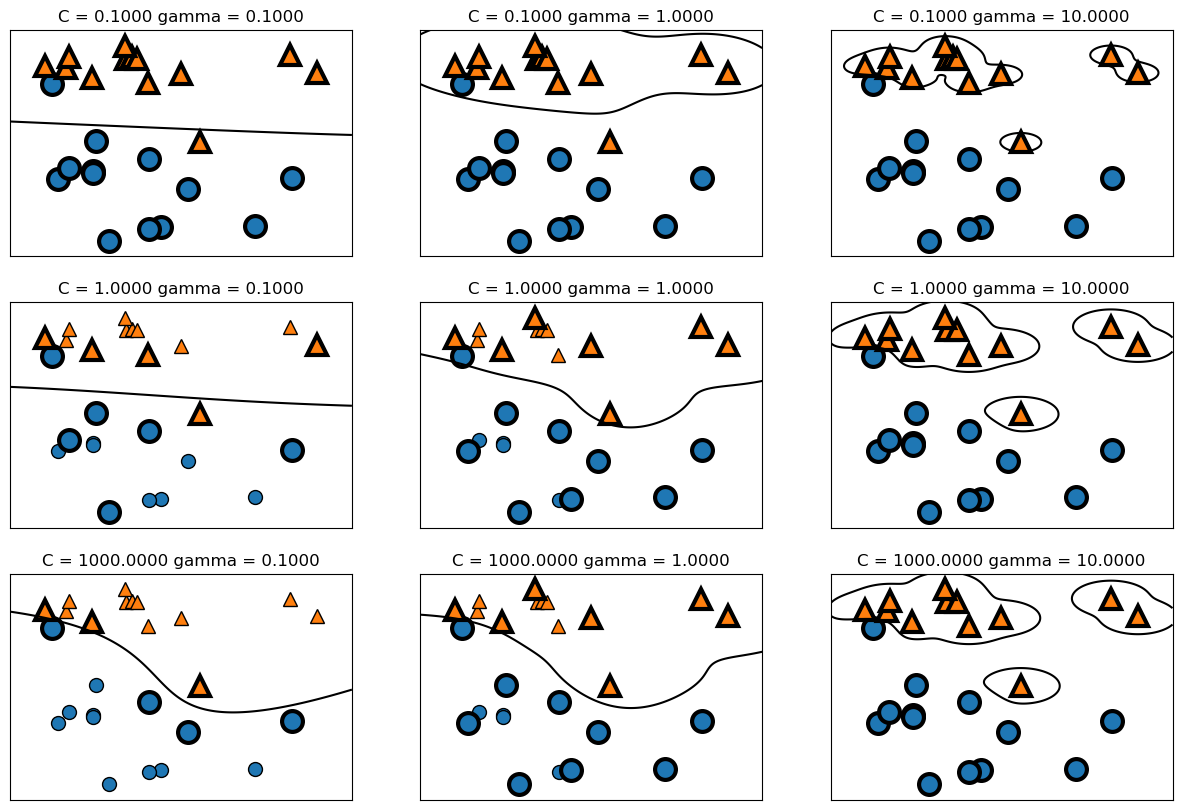

In [60]:
flg, axes = plt.subplots(3,3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)